In [1]:
!pip install nltk

In [2]:
import nltk
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('brown')
nltk.download('vader_lexicon')
nltk.download('movie_reviews')
nltk.download('maxent_ne_chunker_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng

True

In [56]:
from nltk.tokenize import word_tokenize,sent_tokenize
text = "Tesla was founded in July 2003 by Martin Eberhard and Marc Tarpenning as Tesla Motors. Its name is a tribute to inventor and electrical engineer Nikola Tesla"
word_tokens = word_tokenize(text)
sent_tokens = sent_tokenize(text)
print(sent_tokens)
print(word_tokens)

['Tesla was founded in July 2003 by Martin Eberhard and Marc Tarpenning as Tesla Motors.', 'Its name is a tribute to inventor and electrical engineer Nikola Tesla']
28


In [24]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens  if word.lower() not in stop_words]
print(filtered_words)

['Tesla', 'founded', 'July', '2003', 'Martin', 'Eberhard', 'Marc', 'Tarpenning', 'Tesla', 'Motors', '.', 'name', 'tribute', 'inventor', 'electrical', 'engineer', 'Nikola', 'Tesla']


In [25]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
words = ['running', 'runner', 'ran']
stemmed_words = [stemmer.stem(word) for word in words]
print(stemmed_words)


['run', 'runner', 'ran']


In [28]:
from nltk.stem import WordNetLemmatizer
lemmatizer  = WordNetLemmatizer()
words = ['running', 'runner', 'ran']
lemmatized_words = [lemmatizer.lemmatize(word , pos= 'v') for word in words]
print(lemmatized_words)

['run', 'runner', 'run']


In [29]:
tagged = nltk.pos_tag(word_tokens)
print(tagged)

[('Tesla', 'NNP'), ('was', 'VBD'), ('founded', 'VBN'), ('in', 'IN'), ('July', 'NNP'), ('2003', 'CD'), ('by', 'IN'), ('Martin', 'NNP'), ('Eberhard', 'NNP'), ('and', 'CC'), ('Marc', 'NNP'), ('Tarpenning', 'NNP'), ('as', 'IN'), ('Tesla', 'NNP'), ('Motors', 'NNPS'), ('.', '.'), ('Its', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('tribute', 'NN'), ('to', 'TO'), ('inventor', 'NN'), ('and', 'CC'), ('electrical', 'JJ'), ('engineer', 'NN'), ('Nikola', 'NNP'), ('Tesla', 'NNP')]


In [30]:
from nltk import ne_chunk
entities = ne_chunk(tagged)
print(entities)

(S
  (PERSON Tesla/NNP)
  was/VBD
  founded/VBN
  in/IN
  July/NNP
  2003/CD
  by/IN
  (PERSON Martin/NNP Eberhard/NNP)
  and/CC
  (PERSON Marc/NNP Tarpenning/NNP)
  as/IN
  (ORGANIZATION Tesla/NNP Motors/NNPS)
  ./.
  Its/PRP$
  name/NN
  is/VBZ
  a/DT
  tribute/NN
  to/TO
  inventor/NN
  and/CC
  electrical/JJ
  engineer/NN
  (PERSON Nikola/NNP Tesla/NNP))


<Axes: xlabel='Samples', ylabel='Counts'>

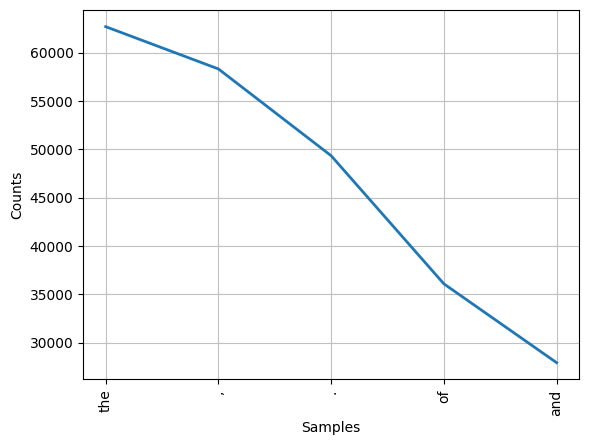

In [34]:
from nltk.corpus import brown
from nltk.probability import FreqDist
words = brown.words()
fdist = FreqDist(words)
fdist.plot(5)

In [40]:
grammer = "NP : {<DT> <JJ>* <NN>}"
chunk_parser = nltk.RegexpParser(grammer)
tree = chunk_parser.parse(tagged)
tree.pretty_print()

                                                                                                                            S                                                                                                                                        
     _______________________________________________________________________________________________________________________|___________________________________________________________________________________________________________________________              
    |        |         |        |      |        |      |       |           |         |       |           |          |       |          |       |     |        |      |      |        |        |          |            |          |          |           NP           
    |        |         |        |      |        |      |       |           |         |       |           |          |       |          |       |     |        |      |      |        |        |          |           

In [48]:
from gensim.models import Word2Vec
sentences = [['hello', 'world'], ['i', 'love', 'nlp']]
model = Word2Vec(sentences, min_count=1)
vector = model.wv['hello']
print(vector)


[-0.00713902  0.00124103 -0.00717672 -0.00224462  0.0037193   0.00583312
  0.00119818  0.00210273 -0.00411039  0.00722533 -0.00630704  0.00464722
 -0.00821997  0.00203647 -0.00497705 -0.00424769 -0.00310898  0.00565521
  0.0057984  -0.00497465  0.00077333 -0.00849578  0.00780981  0.00925729
 -0.00274233  0.00080022  0.00074665  0.00547788 -0.00860608  0.00058446
  0.00686942  0.00223159  0.00112468 -0.00932216  0.00848237 -0.00626413
 -0.00299237  0.00349379 -0.00077263  0.00141129  0.00178199 -0.0068289
 -0.00972481  0.00904058  0.00619805 -0.00691293  0.00340348  0.00020606
  0.00475375 -0.00711994  0.00402695  0.00434743  0.00995737 -0.00447374
 -0.00138926 -0.00731732 -0.00969783 -0.00908026 -0.00102275 -0.00650329
  0.00484973 -0.00616403  0.00251919  0.00073944 -0.00339215 -0.00097922
  0.00997913  0.00914589 -0.00446183  0.00908303 -0.00564176  0.00593092
 -0.00309722  0.00343175  0.00301723  0.00690046 -0.00237388  0.00877504
  0.00758943 -0.00954765 -0.00800821 -0.0076379   0.

In [53]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
text = "I love NLTK!"
sentiment = sia.polarity_scores(text)
print(sentiment)


{'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.6696}


In [55]:
from nltk.util import ngrams
from nltk import FreqDist
bigrams = list(ngrams(word_tokens, 2))
fdist_bigrams = FreqDist(bigrams)
print(fdist_bigrams)


<FreqDist with 27 samples and 27 outcomes>


In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Sample data
train_texts = ["I love programming", "I hate bugs", "Python is great", "I dislike errors"]
train_labels = ["positive", "negative", "positive", "negative"]

test_texts = ["I love coding in Python", "I hate bugs in code"]

# Create a model pipeline
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Fit the model on the training data
model.fit(train_texts, train_labels)

# Make predictions on the test data
predictions = model.predict(test_texts)

# Output the predictions
print(predictions)


['positive' 'negative']


In [3]:
from nltk.corpus import movie_reviews
from nltk.classify import NaiveBayesClassifier
import random
# Prepare dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)
# Feature extraction function
def document_features(doc):
    words = set(doc)
    features = {}
    for word in movie_reviews.words():
        features['contains({})'.format(word)] = (word in words)
    return features
featuresets = [(document_features(d), c) for (d, c) in documents]
# Training the classifier
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))


KeyboardInterrupt: 